<a href="https://colab.research.google.com/github/deevijbansal/DSoC-2024/blob/main/DSoC_Week_1_(4)_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3415         66  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1187         30  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10930        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [6]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
100% 177M/178M [00:01<00:00, 75.3MB/s]
100% 178M/178M [00:01<00:00, 93.2MB/s]


In [7]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
one_hot = pd.get_dummies(df['type'])
df = df.drop('type', axis=1)
df = df.join(one_hot)

In [12]:
df = df.drop(columns = ['nameOrig'])
df["nameDest_type"] = df["nameDest"].str[0]

one_hot = pd.get_dummies(df['nameDest_type'])
df = df.drop('nameDest_type', axis=1)
df = df.join(one_hot)

In [13]:
df = df.drop(columns = ['nameDest', 'M'])

In [14]:
def norm_column(df, column):
    df_col = df[column]
    min_val = df_col.min()
    max_val = df_col.max()
    df[column] = (df_col - min_val) / (max_val - min_val)

In [15]:
columns = [
    "step",
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest"
]

for col in columns:
    norm_column(df, col)

In [16]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


In [17]:
df_isFraud = df[df['isFraud'] == 1]

In [18]:
df_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True


In [19]:
df_isNotFraud = df[df['isFraud'] == 0]
df_isNotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.000000,0.000106,0.002855,0.003233,0.00000,0.000000,0,0,False,False,False,True,False,False
1,0.000000,0.000020,0.000357,0.000391,0.00000,0.000000,0,0,False,False,False,True,False,False
4,0.000000,0.000126,0.000697,0.000603,0.00000,0.000000,0,0,False,False,False,True,False,False
5,0.000000,0.000085,0.000904,0.000929,0.00000,0.000000,0,0,False,False,False,True,False,False
6,0.000000,0.000077,0.003075,0.003551,0.00000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,0.966307,0.000093,0.008707,0.010289,0.00000,0.000000,0,0,False,False,False,True,False,False
6362320,0.966307,0.001722,0.000065,0.000000,0.00000,0.000447,0,0,False,True,False,False,False,True
6362321,0.966307,0.002015,0.002820,0.000000,0.00007,0.000593,0,0,False,True,False,False,False,True
6362322,0.966307,0.000888,0.000226,0.000000,0.00000,0.000230,0,0,False,False,False,False,True,True


In [20]:
df_isNotFraud = df[df['isFraud'] == 0]
df_isNotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.000000,0.000106,0.002855,0.003233,0.00000,0.000000,0,0,False,False,False,True,False,False
1,0.000000,0.000020,0.000357,0.000391,0.00000,0.000000,0,0,False,False,False,True,False,False
4,0.000000,0.000126,0.000697,0.000603,0.00000,0.000000,0,0,False,False,False,True,False,False
5,0.000000,0.000085,0.000904,0.000929,0.00000,0.000000,0,0,False,False,False,True,False,False
6,0.000000,0.000077,0.003075,0.003551,0.00000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,0.966307,0.000093,0.008707,0.010289,0.00000,0.000000,0,0,False,False,False,True,False,False
6362320,0.966307,0.001722,0.000065,0.000000,0.00000,0.000447,0,0,False,True,False,False,False,True
6362321,0.966307,0.002015,0.002820,0.000000,0.00007,0.000593,0,0,False,True,False,False,False,True
6362322,0.966307,0.000888,0.000226,0.000000,0.00000,0.000230,0,0,False,False,False,False,True,True


In [21]:
df_isNotFraud = df_isNotFraud.sample(n=16000)
df = pd.concat([df_isFraud, df_isNotFraud])

In [22]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816589,0.301887,0.000886,0.137112,0.166416,0.004552,0.004320,0,0,True,False,False,False,False,True
1150807,0.175202,0.002692,0.177044,0.217768,0.001690,0.000990,0,0,True,False,False,False,False,True
693072,0.047170,0.000911,0.001677,0.003714,0.000393,0.000156,0,0,True,False,False,False,False,True
4484382,0.435310,0.004546,0.000000,0.000000,0.026750,0.027918,0,0,False,True,False,False,False,True


In [23]:
! pip install --user xgboost

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from xgboost import XGBClassifier

In [27]:
model = XGBClassifier()

In [28]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.9952508775552343

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

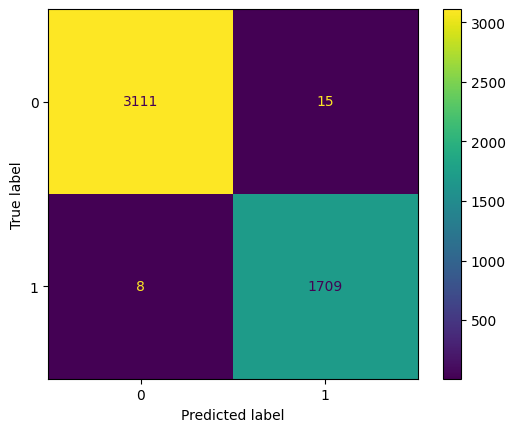

In [33]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9952508775552343
Precision: 0.9912993039443155
Recall: 0.9953407105416424


In [36]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score)

F1 Score: 0.993315896541703
